In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
points = np.array([[2,10],[2,5],[8,5],[5,8],[7,5],[6,4],[1,2],[4,9]])
k=3
np.random.seed(42)

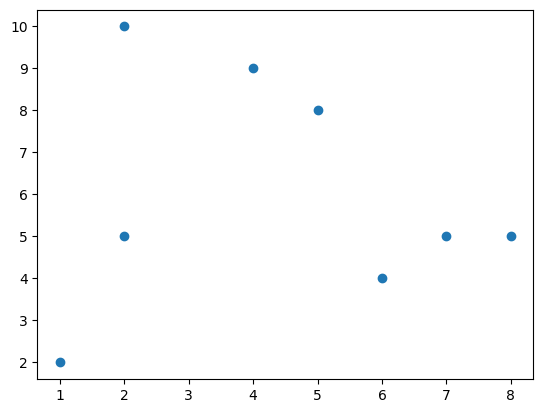

In [3]:
plt.scatter(points[:,0], points[:,1])

In [4]:
centroids = points[np.random.choice(len(points), k, replace=False )]
cluster = np.random.choice(k,len(points))

In [5]:
def calculate_dist(centroids):
    dist = lambda x,y: ((y[0]-x[0])**2+(y[1]-x[1])**2)**(1/2)
    ndata = pd.DataFrame(data=[], columns=np.arange(k))
    for i in points:
        dist_row = [dist(i,j) for j in centroids]
        ndata.loc[ndata.shape[0]] = dist_row
    return ndata

def upd_cluster(ndata):
    return np.array(ndata.idxmin(1))

def centroid_upd(ncentroids, ncluster):
    for i in range(k):
        p = points[np.argwhere(ncluster==i)]
        p = p.reshape(p.shape[0],p.shape[2])
        ncentroids[i] = p.mean(axis=0)
    return ncentroids

def create_cluster_points(cluster):
    final_cluster = []
    for i in range(k):
        p = points[np.argwhere(cluster==i)]
        p = p.reshape(p.shape[0],p.shape[2])
        final_cluster.append(p)
    return final_cluster

def display_cluster(final_cluster):
    plt_colors = np.array(list(mcolors.CSS4_COLORS.keys()))
    c = plt_colors[np.random.choice(len(plt_colors),k,replace=False)]
    for i in range(k):
        plt.scatter(final_cluster[i][:,0],final_cluster[i][:,1], c=c[i])
    plt.show()


In [6]:

while(True):
    dist_table = calculate_dist(centroids)
    # print(data)
    cluster_new = upd_cluster(dist_table)
    # print(cluster_new)
    if list(cluster)==list(cluster_new):
        break
    else:
        cluster=cluster_new
    centroid = centroid_upd(centroids, cluster)
final_cluster = create_cluster_points(cluster)

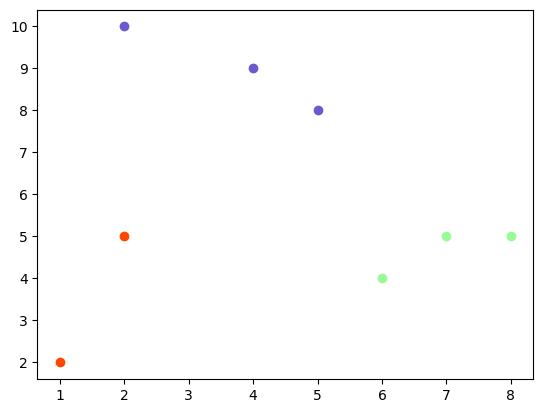

In [7]:
display_cluster(final_cluster)